#Representación del lenguaje natural
El objetivo de este notebook es mostrar mecanismos que permitan representar diferentes elementos del lenguaje natural (palabras, textos) y a partir de ellos derivar aplicaciónes de procesamiento del lenguaje natural
## El corpus
Una primera etapa de representación implica tener una colección de documentos sobre la cual hacer la representación. Por ello es importante distinguir y obtener la colección de documentos.

In [1]:
import sklearn
import os, re, string, collections, random
import spacy
import nltk
import numpy, matplotlib
import pandas as pd

Vamos a mostrar primero la capacidad de NLTK de crear un corpus

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [10]:
from nltk.corpus import PlaintextCorpusReader
corpus_root="/content/drive/My Drive/corpus"
corpusesp=PlaintextCorpusReader(corpus_root,".*")
"""para ver que archivos quedaron"""
corpusesp.fileids()


['13_CLS_Final.txt',
 'canales.csv',
 'candido-de-voltaire.txt',
 'cuentos_allan_poe.txt',
 'el-buscon.txt',
 'elquijote.txt',
 'fabulas_samaniego.txt',
 'juan_tenorio.txt',
 'libro_cocina.txt',
 'milyuna_t1.txt',
 'nuevo_testamento_valera.txt',
 'obras-escogidas_becquer.txt',
 'odisea.txt',
 'relacionhistoricasucesosdetupacamaru.txt',
 'sentiment/13_CLS_Final.txt',
 'sentiment/13_CLS_Final2.txt',
 'sentiment/13_CLS_Final3.txt',
 'sentiment/tass14.txt',
 'sentiment/tass14neg.txt',
 'sentiment/tass14pos.txt',
 'tass14neg.txt',
 'tass14pos.txt',
 'tass14tot.xlsx',
 'tradiciones_peruanas_ricardo_palma.txt']

Ahora veamos una de sus capacidades: ver las frecuencias en diferentes documentos y compararlas. Resulta evidente que podemos entender características de un documento a partir de su comparación con otros documentos

In [ ]:
condf=nltk.ConditionalFreqDist(
        (libro,palabra)
        for libro in corpusesp.fileids()
        for palabra in corpusesp.words(libro))

condf.tabulate(samples=["hombre","mujer"])


                                         hombre  mujer 
                 candido-de-voltaire.txt     47      0 
                   cuentos_allan_poe.txt     36     26 
                           el-buscon.txt     57     22 
                           elquijote.txt    258    222 
                   fabulas_samaniego.txt     53      9 
                        juan_tenorio.txt     46      8 
                        libro_cocina.txt     11      1 
                          milyuna_t1.txt     46     51 
             nuevo_testamento_valera.txt     65     20 
             obras-escogidas_becquer.txt     42     72 
                              odisea.txt    118     97 
relacionhistoricasucesosdetupacamaru.txt      5      0 
  tradiciones_peruanas_ricardo_palma.txt     37     33 


Ello lleva a pensar que comparando los documentos podemos obtener un resumen (Wordcloud) del documento que, en el fondo, es la representación del documento.
Para ello vamos a crear nuestro propio corpus de manera iterativa con archivos de texto

In [27]:
os.chdir("/content/drive/My Drive/corpus")
documents = []
for f in os.listdir():
    if f[-4:] == '.txt':
        documents.append(f[:-4])



In [28]:
documents

['milyuna_t1',
 'relacionhistoricasucesosdetupacamaru',
 'tradiciones_peruanas_ricardo_palma',
 'elquijote',
 'cuentos_allan_poe',
 'juan_tenorio',
 'libro_cocina',
 'obras-escogidas_becquer',
 'candido-de-voltaire',
 'el-buscon',
 'nuevo_testamento_valera',
 'fabulas_samaniego',
 'odisea']

In [ ]:
len(documents)

13

In [29]:
contents = []
for document in documents:
    with open(document+'.txt', 'r', encoding="UTF-8") as f:
        contents.append(f.read())
len(contents)


13

In [30]:
for i in range(0,len(contents)):
    inicio=contents[i].find("EBOOK")
    final=contents[i].find("END OF")
    contents[i]=contents[i][inicio:final]

In [31]:
for i in range(len(contents)):
    contents[i] = re.sub("\""," ",contents[i])
    contents[i] = re.sub ("\n|\t"," ",contents[i])
    contents[i]=contents[i].lower()


## TF-IDF: Representación de textos y palabras
Vamos a utilizar una técnica denominada TF-IDF para encontrar las palabras más relevantes de un texto a partir de su comparación con otros textos. En particular TF-IDF relaciona la frecuencia de los términos en el texto (documento) y la frecuencia de los mismos términos en la colección de documentos. A mayor frecuencia del término/palabra (TF=Term frequency), mayor importancia; a mayor porcentaje de documentos con el término/palabra, **menor** importancia (por eso se llama IDF: Inverse Document Frequency)
Inicialmente cargamos las librerías necesarias para hacerlo de forma automática

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

Después de usar Scikitlearn para calcular TF-IDF, son necesarios varios arreglos de conversión de la matriz resultante. El más relevante en la teoría es la conversión a matrices densas para ahorrar espacio y recursos. Así mismo es necesario definir una frecuencia máxima de documentos (max_df) para evitar stopwords, una frecuencia mínima de documentos (min_df) para usar palabras compartidas, y un número máximo de palabras (max_features) puesto que la dimensionalidad del lenguaje (número de palabras) es alta y costosa computacionalmente.

In [ ]:
##calcular TF-IDF
vectores=TfidfVectorizer(max_df=0.9,min_df=2,max_features=1000)
tfs=vectores.fit_transform(contents)
##guardar los nombres
nombres=vectores.get_feature_names()
#convertir la matriz a densa, luego lista, luego dataframe y trasponerla
matriz=tfs.todense()
matlist=matriz.tolist()
finalm=pd.DataFrame(matlist,columns=nombres)
final2=finalm.transpose()
final2.head(10)


,0,1,2,3,4,5,6,7,8,9,10,11,12
10,0.003577,0.017969,0.012628,0.000143,0.002403,0.0,0.009528,0.000000,0.0,0.0,0.073500,0.013002,0.004377
11,0.003859,0.011077,0.004541,0.000000,0.002593,0.0,0.004233,0.000000,0.0,0.0,0.077312,0.018703,0.003333
12,0.005145,0.006923,0.002271,0.000000,0.002593,0.0,0.006046,0.000000,0.0,0.0,0.077312,0.009351,0.002222
14,0.004174,0.005991,0.004912,0.000000,0.000000,0.0,0.004578,0.000000,0.0,0.0,0.083628,0.007586,0.007210
15,0.003859,0.004154,0.002271,0.000000,0.000000,0.0,0.009674,0.003693,0.0,0.0,0.075330,0.011689,0.004722
16,0.003577,0.006417,0.002105,0.000143,0.002403,0.0,0.003363,0.000000,0.0,0.0,0.069825,0.006501,0.002575
18,0.006431,0.011077,0.006812,0.000000,0.007778,0.0,0.001814,0.000000,0.0,0.0,0.075330,0.007013,0.004166
20,0.005565,0.019471,0.004912,0.000000,0.000000,0.0,0.009811,0.000000,0.0,0.0,0.079339,0.020230,0.004206
25,0.005145,0.018000,0.004541,0.000000,0.000000,0.0,0.005442,0.001847,0.0,0.0,0.061453,0.004676,0.003333
30,0.003021,0.013008,0.000000,0.000000,0.000000,0.0,0.019171,0.000000,0.0,0.0,0.053541,0.010981,0.003914


Obtenemos una matriz de términos vs documentos, en donde podríamos definir numéricamente un término como su vector de TF-IDF en los documentos, y definir numéricamente un documento como su vector de términos en términos de TF-IDF. Usaremos esa potente idea de construir vectores numéricos (de términos o de documentos) más adelante como un elemento central a la hora de realizar aplicaciones de lenguaje natural.

In [ ]:
final2.shape

(1000, 13)

Vamos a ordenar cada documento según sus palabras más *importantes* o *diferenciales* , las que tienen mayor TF-IDF

In [ ]:
poetfidf=final2.sort_values([4], ascending=False)
quijotfidf=final2.sort_values([3], ascending=False)
cocinatfidf=final2.sort_values([6], ascending=False)
bibliatfidf=final2.sort_values([10], ascending=False)
bibliatfidf["palabra"]=bibliatfidf.index
bibliafinal=bibliatfidf[[7,"palabra"]]
bibliafinal.head(10)

,7,palabra
jesús,0.007098,jesús
vosotros,0.023963,vosotros
mí,0.067996,mí
discípulos,0.000000,discípulos
judíos,0.011830,judíos
ley,0.000000,ley
había,0.323718,había
dijo,0.078343,dijo
tú,0.112862,tú
cristo,0.000000,cristo


In [ ]:
cocinatfidf["palabra"]=cocinatfidf.index
cocinafinal=cocinatfidf[[6,"palabra"]]
cocinafinal.head(10)


,6,palabra
salsa,0.383554,salsa
manteca,0.359180,manteca
caldo,0.288138,caldo
despues,0.268299,despues
pimienta,0.237574,pimienta
sal,0.236441,sal
cacerola,0.178980,cacerola
cocer,0.164065,cocer
sopa,0.127670,sopa
cocido,0.121712,cocido


Eso nos permite generar un wordlcoud más limpio de lo que diferencia a un documento

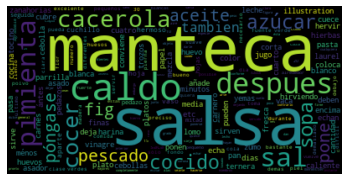

None

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

##Wordcloud con las palabras del tf-idf
diccio={}
for freq,name in cocinafinal.values:
    diccio[name]=freq

nube = WordCloud()
nube.generate_from_frequencies(frequencies=diccio)
plt.figure()
plt.imshow(nube, interpolation="bilinear")
plt.axis("off")
figura1=plt.show()
display(figura1)

## Distancia entre vectores (términos,documentos) y sus aplicaciones: La similitud coseno
Una vez se representan los documentos (o términos) como vectores es posible calcular una distancia entre ellos.
La distancia coseno es ideal si se requiere comparar documentos más largos con otros más cortos, y también para  vectores con muchos ceros. Por eso es ideal en contextos de NLP.
Por ejemplo, podemos usarlo como motor de búsqueda:

In [ ]:
busqueda="importancia del reciclaje"
oracion0="El reciclaje de papel es importante para el bien del mundo"
oracion1="El quijote es un personaje de novela inigualable. Sus ocurrencias y sus andanzas son inimitables"
oracion2="El papel es un elemento que puede ser sometido a reciclaje. En el mundo cada vez hay más importancia en este tema"
oracionpoc=[busqueda,oracion0,oracion1,oracion2]


Ahora calculamos su TF-IDF, y luego su distancia coseno. Quien tenga menor distancia coseno es el mejor "match" para la búsqueda; en este caso, como se calcula la similitud (1- distancia coseno), se debe buscar la mayor similitud.

In [ ]:
vect = TfidfVectorizer(use_idf=False, norm="l1")
tocoocz1=vect.fit_transform(oracionpoc)
nombrescoocz1=vect.get_feature_names()
matrizcz1=tocoocz1.todense()
matlistcz1=matrizcz1.tolist()
import pandas as pd
finalcz1=pd.DataFrame(matlistcz1,columns=nombrescoocz1)
from sklearn.metrics.pairwise import cosine_similarity
buscando=cosine_similarity(finalcz1[0:1],finalcz1[1:4])
print(buscando)

[[0.32025631 0.         0.23094011]]


Nótese que es indispensable que haya palabras exactamente iguales. Sin embargo eso puede trabajarse (o resolverse) con representaciones de palabras.
También podemos hacer un sistema de respuesta a preguntas:

In [ ]:
busqueda="¿qué vende su tienda?"
resp0="la tienda vende artículos deportivos"
resp1="La tienda tiene horario de 8 a 5"
resp2="La tienda tiene los precios más bajos"

oracionpoc=[busqueda,resp0,resp1,resp2]

tocoocz1=vect.fit_transform(oracionpoc)
nombrescoocz1=vect.get_feature_names()
matrizcz1=tocoocz1.todense()
matlistcz1=matrizcz1.tolist()
finalcz1=pd.DataFrame(matlistcz1,columns=nombrescoocz1)
from sklearn.metrics.pairwise import cosine_similarity
respondiendo=cosine_similarity(finalcz1[0:1],finalcz1[1:4])
print(respondiendo)

[[0.4472136  0.2236068  0.18898224]]


También podemos hacer agrupaciones de textos, clasificando los mismos en grupos. Vamos a agrupar canales de televisión según sus descripciones

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving canales.csv to canales.csv


In [ ]:


canal = pd.read_csv("canales.csv", sep=";", encoding="latin-1")
canal.head(6)




,id,channel,descripcion
0,1,6.1 Multimedios Guadalajara,Además de la programación de noticieros y depo...
1,2,A&E,El canal se centró originalmente en la program...
2,3,A+,Es una red de canales de televisión mexicana d...
3,4,Adenalina,Encontré Adrenalina pero no Adenalina asumo qu...
4,5,ADN40,Es un canal de televisión abierta mexicana pr...
5,6,AMC,AMC es un canal de televisión por suscripción ...


Creamos el Tf-idf de cada descripción de canal

In [ ]:

listcanal=canal["descripcion"].tolist()
vectores=TfidfVectorizer(max_df=0.9,min_df=2,max_features=1000)
tfs=vectores.fit_transform(listcanal)
nombres=vectores.get_feature_names()
matriz=tfs.todense()
matlist=matriz.tolist()
finalm=pd.DataFrame(matlist,columns=nombres)
final2=finalm.transpose()
finalm.head(10)


,10,11,12,1990,1991,1994,1996,1997,20,2002,2007,2008,2010,2012,2016,2017,2019,22,24,30,31,60,abierta,aborda,abreviado,abril,acción,actor,actual,actuales,actualidad,actualmente,adaptación,además,administrado,adolescentes,adulto,adultos,afiliadas,agenda,...,universal,univision,univisión,uno,urbano,utah,vacio,valentina,valores,variada,varias,variedad,variedades,varios,vespertino,vez,viacomcbs,vida,viernes,viewers,virtual,visión,vista,vivo,vuelve,vídeos,walt,warner,warnermedia,wild,with,woki,xhaw,xy,ya,zaragoza,zoológico,éxito,último,últimos
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.120626,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.17832,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08874,0.000000,0.000000,0.0,0.0,0.0,0.08874,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.08874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.148957,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148957,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.164492,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.110732,0.110732,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.110732,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.110732
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112562,0.0,0.0,0.0,0.0,0.0,0.0,0.119801,0.0,0.106947,0.000000
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0

In [ ]:
finalm.shape

(128, 738)

Calculamos la similitud coseno entre canales

In [ ]:
similitudes=cosine_similarity(finalm[0:129],finalm[0:129])
similitudes[0:5,0:5]


array([[1.        , 0.0205017 , 0.21784372, 0.111739  , 0.23906156],
       [0.0205017 , 1.        , 0.03874311, 0.17893965, 0.03078678],
       [0.21784372, 0.03874311, 1.        , 0.11023448, 0.44038309],
       [0.111739  , 0.17893965, 0.11023448, 1.        , 0.0978965 ],
       [0.23906156, 0.03078678, 0.44038309, 0.0978965 , 1.        ]])

para aplicar K-means debemos normalizar la distancia coseno

In [ ]:
import numpy as np
length = np.sqrt((finalm**2).sum(axis=1))[:,None]
finalm2 = finalm / length


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


para aplicar k-medias miramos el gráfico de codo y así proponer un número de clusteres

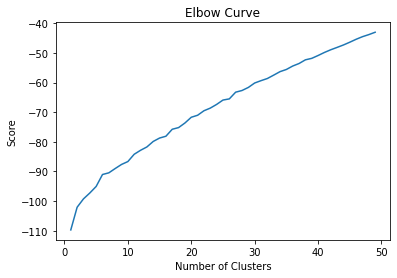

None

In [ ]:
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt

Nc = range(1, 50)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(finalm2).score(finalm2) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
codo=plt.show()
display(codo)

Ejecutamos un k-medias y miramos sus resultados

In [ ]:
kmeans = KMeans(n_clusters=10).fit(finalm2)
centroids = kmeans.cluster_centers_
print(centroids)



[[ 0.00000000e+00  3.56308691e-02  0.00000000e+00 ...  3.79222117e-02
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  8.67361738e-19  6.91768511e-03 ...  6.50521303e-19
   3.24105472e-03  2.51662857e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  4.33680869e-19  2.12434049e-02 ... -2.16840434e-19
  -8.67361738e-19  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -8.67361738e-19 ...  2.16840434e-19
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [ ]:
labels = pd.DataFrame(kmeans.predict(finalm2))
totalcl=pd.concat([canal,labels],axis=1)
totalcl.columns=["id","canal","descripcion","cluster"]
totalcl.sort_values(by=['cluster'], inplace=True)
totalcl.head(100)


,id,canal,descripcion,cluster
12,13,Azteca Uno -1 Hr.,No encontré información,0
96,97,Once Ninos,"Canal 11 (actualmente estilizado como once), e...",0
32,33,Canal Once,Canal 11 es la primera cadena de televisión ed...,0
57,58,Foro Tv,Canal enfocado principalmente a los noticieros...,0
13,14,Azteca Uno -2 Hrs.,No encontré información,0
...,...,...,...,...
0,1,6.1 Multimedios Guadalajara,Además de la programación de noticieros y depo...,6
63,64,FX,Canal orientado a jóvenes y adultos. Emite ser...,6
76,77,La Octava,XHFAMX-TDT es una estación de televisión comer...,6
17,18,Boomerang,Boomerang es un canal de televisión por suscri...,6


##Generación de lenguaje natural
Los generadores de lenguaje natural tiene como objetivo predecir, dado un texto anterior, el texto que viene después. Si bien su aplicación inicial es simplemente ser predictores de texto, se han convertido en herramienta fundamental para las aplicaciones modernas de NLP, pues generan una representación del lenguaje. Miremos:

In [32]:
import nltk 
from nltk import bigrams, trigrams

from collections import Counter, defaultdict

       
candido=corpusesp.words("candido-de-voltaire.txt")

pares=nltk.bigrams(candido)
generator=nltk.ConditionalFreqDist(pares)

##de pronto cambiar a 3 para hablar de predictor de texto"
def predictor(dist,palabra,num):
    for i in range(num):
        print(palabra,end=" ")
        palabra=dist[palabra].max()



In [33]:
#probar vieja, hizo, real#        
predictor(generator,"vieja",12)


vieja , y el señor baron , y el señor baron , 

In [ ]:
generator["vieja"]

FreqDist({',': 15,
          '.': 10,
          ';': 7,
          'anduviéron': 1,
          'atravesáron': 1,
          'cayó': 1,
          'con': 1,
          'cuidaba': 1,
          'dando': 1,
          'de': 1,
          'el': 1,
          'en': 4,
          'estan': 1,
          'habia': 1,
          'la': 1,
          'los': 1,
          'quando': 1,
          'que': 3,
          'razon': 1,
          'remedió': 2,
          'se': 2,
          'á': 3})

Ahora vamos a hacer un generador más complejo (basado en un ejemplo visto en analyticsvidtha). Creo un contenedor de modelo:

In [34]:
import nltk
nltk.download('punkt')
model = defaultdict(lambda: defaultdict(lambda: 0))
prueba3=nltk.word_tokenize(contents[3])
prueba3[1:100]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['don',
 'quijote',
 '***',
 'produced',
 'by',
 'an',
 'anonymous',
 'project',
 'gutenberg',
 'volunteer',
 '.',
 'text',
 'file',
 'corrections',
 'and',
 'new',
 'html',
 'file',
 'by',
 'joaquin',
 'cuenca',
 'abela',
 '.',
 'el',
 'ingenioso',
 'hidalgo',
 'don',
 'quijote',
 'de',
 'la',
 'mancha',
 'tasa',
 'yo',
 ',',
 'juan',
 'gallo',
 'de',
 'andrada',
 ',',
 'escribano',
 'de',
 'cámara',
 'del',
 'rey',
 'nuestro',
 'señor',
 ',',
 'de',
 'los',
 'que',
 'residen',
 'en',
 'su',
 'consejo',
 ',',
 'certifico',
 'y',
 'doy',
 'fe',
 'que',
 ',',
 'habiendo',
 'visto',
 'por',
 'los',
 'señores',
 'dél',
 'un',
 'libro',
 'intitulado',
 'el',
 'ingenioso',
 'hidalgo',
 'de',
 'la',
 'mancha',
 ',',
 'compuesto',
 'por',
 'miguel',
 'de',
 'cervantes',
 'saavedra',
 ',',
 'tasaron',
 'cada',
 'pliego',
 'del',
 'dicho',
 'libro',
 'a',
 'tres',
 'maravedís',
 'y',
 'medio',
 ';',
 'el',
 'cual',
 'tiene']

Cuento las frecuencias de co-ocurrencias en trigramas

In [35]:
   for w1, w2, w3 in trigrams(prueba3, pad_right=True, pad_left=True):
        model[(w1, w2)][w3] += 1

Transformo en probabilidades

In [36]:
for w1_w2 in model:
    total_count = float(sum(model[w1_w2].values()))
    for w3 in model[w1_w2]:
        model[w1_w2][w3] /= total_count

dict(model["el","caballo"])


{',': 0.08695652173913043,
 'a': 0.043478260869565216,
 'al': 0.043478260869565216,
 'con': 0.043478260869565216,
 'de': 0.2608695652173913,
 'en': 0.08695652173913043,
 'está': 0.043478260869565216,
 'lleno': 0.043478260869565216,
 'mostraba': 0.043478260869565216,
 'no': 0.08695652173913043,
 'pegaso': 0.043478260869565216,
 'quedó': 0.043478260869565216,
 'relinche': 0.043478260869565216,
 'se': 0.043478260869565216,
 'y': 0.043478260869565216}

Primer modelo: con palabras máximas

In [37]:
def mln(pal1, pal2, num=10):
    for i in range(num):
        base=dict(model[pal1,pal2])
        print(pal1, end=" ")
        pal1=pal2
        pal2=max(base,key=base.get)


mln("el","caballo")


el caballo de madera , sobre todo , y , 

In [38]:
mln("don", "quijote")


don quijote , y , en el mundo , y 

Se crea un problema debido a los bucles o ciclos. Es mejor escoger una palabra aleatoria al menos.

In [39]:
text = ["el", "caballo"]

sentence_finished = False
 
while not sentence_finished:
  # select a random probability threshold  
  r = random.random()
  accumulator = .0

  for word in model[tuple(text[-2:])].keys():
      accumulator += model[tuple(text[-2:])][word]
      # select words that are above the probability threshold
      if accumulator >= r:
          text.append(word)
          break

  if text[-2:] == [None, None]:
      sentence_finished = True

  if len(text)==100:
      sentence_finished = True
 
print (' '.join([t for t in text if t]))


el caballo a un prado fuera de todo lo miraba atentamente , creyó todo lo que dijo camila : » -lotario , advierte lo que no es deshonra llamar hijo de un tal caballero es temerario y atrevido caballero que aquí pone el que traemos entre manos , y con este hechicero , con endriagos y con esto , comenzó a decir tantos denuestos y baldones a los escuderos dijo en alta voz radamanto- . ablándate , tigre ; humíllate , nembrot soberbio , no los sabía leer ni escrebir ; mas llegar uno por verla , y de los


O aun mejor, con palabras proporcionales a su probabilidad

In [40]:
text3="el"
text4="caballo"
nueva=[text3,text4]
i=0
   
while i<100:
    temporal=random.choices(population=list(model[text3,text4].keys()),weights=list(model[text3,text4].values()),k=1)
    nueva.append(temporal[0])
    text3=text4
    text4=temporal[0]    
    i=i+1
    
totalcreado=" ".join(nueva)
totalcreado    


'el caballo relinche , que está junto a sí mesmas . cuando llegaron a un lagarto que a mí me parece que no dejaban de huir ni de la mancha . la mejor vida , ya que dios me le ha sacado désta ) , que he de echar a las rigurosas manos de tristezas y melancolías . éste tiene dos hijos : el tal boticario ! de aquí adelante no me dieren de vida ; de sancho , y , llamando al ventero , que si lo tal , que aconsejar a su señor con tan buena que un cortesano caballero'

## Ontologías
Otra manera fundamentalmente diferente de representar el lenguaje (y el conocimiento) son las ontologías.
Vamos a explorar una de las ontologías más conocidas: Wordnet

In [ ]:
nltk.download("wordnet")
nltk.download("omw")

from nltk.corpus import wordnet 


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.


Es como tener un diccionario ampliado (tesauro) de términos, abordando de otro modo el conocimiento. Por ejemplo, ver todos los significados de una palabra.

In [ ]:
##extrae todos los posibles "significados"
wordnet.synsets("casa",lang="spa")


[Synset('diggings.n.02'),
 Synset('dwelling.n.01'),
 Synset('house.n.01'),
 Synset('house.n.06'),
 Synset('firm.n.01'),
 Synset('manufacturer.n.01'),
 Synset('family.n.01'),
 Synset('house.n.09'),
 Synset('home.n.03'),
 Synset('home.n.01'),
 Synset('home.n.07')]

Por tanto puede usarse como un traductor, yendo de un idioma al otro. Por supuesto, la ambiguedad del idioma y el contexto van a dificultar la tarea.

In [ ]:
##puedo usarlo de algun modo como un traductor
wordnet.synsets("coucher",lang="fra")
francesingles=wordnet.synsets("coucher",lang="fra")
francesingles


[Synset('lay.v.02'), Synset('bed.n.02')]

Tuve que pasar por el inglés para ir al español

In [ ]:
espanol=[]
for palabra in francesingles:
    espanol.append(" ".join(palabra.lemma_names("spa")))
espanol


['tumbar', 'lecho']

Y luego de vuelta al inglés y al francés

In [ ]:
inglesback=[]
for pal in espanol:
    inglesback.append(wordnet.synsets(pal, lang="spa"))
inglesback


[[Synset('knock.v.01'),
  Synset('down.v.05'),
  Synset('poleax.v.01'),
  Synset('deck.v.03'),
  Synset('lay.v.02'),
  Synset('lie_down.v.01')],
 [Synset('bed.n.02'),
  Synset('bedding_material.n.01'),
  Synset('bed.n.03'),
  Synset('riverbed.n.01')]]

In [ ]:
inglesfinal=[]
for element in inglesback:
    inglesfinal=inglesfinal+element
francesfinal=[]
for palabra in inglesfinal:
    francesfinal.append(palabra.lemma_names("fra"))
francesfinal


[[],
 ['abattre', 'démolir'],
 [],
 ['étage', 'plancher', 'pont'],
 ['coucher', 'déposer', 'poser'],
 ["s'étendre"],
 ['coucher', 'lit', 'parterre', 'planche'],
 ['litière'],
 ['lit'],
 []]

tenemos también definiciones, y ejemplos

In [ ]:
inglesfinal[5].definition()


'assume a reclining position'

In [ ]:
inglesfinal[5].examples()


['lie down on the bed until you feel better']

El conocimiento está también clasificado en taxonomías, teniendo hiperónimos (categoría superior) e hipónimos (categoría inferior)

In [ ]:
dog = wordnet.synset('dog.n.01')
cat=wordnet.synset("cat.n.01")
duck=wordnet.synset("duck.n.01")
table=wordnet.synset("table.n.01")

dog.hypernyms()


[Synset('canine.n.02'), Synset('domestic_animal.n.01')]

In [ ]:
cat.hypernyms()


[Synset('feline.n.01')]

In [ ]:
dog.hyponyms()


[Synset('basenji.n.01'),
 Synset('corgi.n.01'),
 Synset('cur.n.01'),
 Synset('dalmatian.n.02'),
 Synset('great_pyrenees.n.01'),
 Synset('griffon.n.02'),
 Synset('hunting_dog.n.01'),
 Synset('lapdog.n.01'),
 Synset('leonberg.n.01'),
 Synset('mexican_hairless.n.01'),
 Synset('newfoundland.n.01'),
 Synset('pooch.n.01'),
 Synset('poodle.n.01'),
 Synset('pug.n.01'),
 Synset('puppy.n.01'),
 Synset('spitz.n.01'),
 Synset('toy_dog.n.01'),
 Synset('working_dog.n.01')]

In [ ]:
dog.root_hypernyms()


[Synset('entity.n.01')]

In [ ]:
dog.lemmas()


[Lemma('dog.n.01.dog'),
 Lemma('dog.n.01.domestic_dog'),
 Lemma('dog.n.01.Canis_familiaris')]

gracias a la estructura taxonómica podemos también relacionar palabras, y calcular sus distancias.

In [ ]:
wordnet.synset('dog.n.01').lowest_common_hypernyms(wordnet.synset('table.n.01'))


[Synset('entity.n.01')]

In [ ]:
dog.path_similarity(table)


0.07142857142857142

In [ ]:
dog.path_similarity(cat)


0.2

En este notebook vimos distintas aproximaciones a la representación del lenguaje natural